In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [2]:
df1 = pd.read_csv('ContinousDataset.csv')
df2 = pd.read_csv('t20_matches.csv')

In [3]:
df1 = df1.iloc[:,0:8]
df1 = df1.drop(columns = 'Unnamed: 0')
df1 = df1[(df1['Team 1'] == 'India') | (df1['Team 2'] == 'India')]
winningODI = df1[df1['Winner'] == 'India'].values
winningODI = len(winningODI)
loosingODI = df1[df1['Winner'] != 'India'].values
loosingODI = len(loosingODI)
teamList = df1[df1['Winner'] != 'India'].values[:,-1]
teamList = list(set(teamList))

lostMatches = []
wonMatches = []

for i in teamList:
    lostMatches.append(df1[((df1['Team 1'] == i) | (df1['Team 2'] == i)) & (df1['Winner'] != 'India')].values)
    wonMatches.append(df1[((df1['Team 1'] == i) | (df1['Team 2'] == i)) & (df1['Winner'] == 'India')].values)
    

lostMatchesNo = []
wonMatchesNo = []

for i in range(len(teamList)):
    lostMatchesNo.append((teamList[i],len(lostMatches[i])))
    wonMatchesNo.append((teamList[i],len(wonMatches[i])))
    


In [4]:
df2 = df2[(df2['home'] == 'India') | (df2['away'] == 'India')]
x  = df2['result'].values

for i,j in enumerate(x):
    y = x[i].split()[0:2]
    y = y[0]+" "+y[1]
    x[i] = y
    
df2['result'] = x
df2_t20 = df2.iloc[:,0:10]
df_india_won = df2[df2['result'] == 'India won']
df_india_lost = df2[(df2['result'] != 'India won')]
t = list(set(df_india_lost['result'].values))

for i in t:
    if i in ['Match abandoned','Match tied','No result']:
        t.remove(i)
#t.remove('Match abandoned')
        
df_india_lost = (df_india_lost[(df_india_lost['result'] != 'No result') & (df_india_lost['result'] != 'Match tied')& (df_india_lost['result'] != 'Match abandoned')])

for i,j in enumerate(t):
    if 'won' in j:
        j = j.split()[0]
        t[i] = j
        

matches_lost = []

for i in t:
    r = df_india_lost[(df_india_lost['home'] == i) | (df_india_lost['away'] == i)].values
    matches_lost.append((i,len(r)))
    
    
matches_won = []

for i in t:
    r = df_india_won[(df_india_won['home'] == i) | (df_india_won['away'] == i)].values
    matches_won.append((i,len(r)))
    


In [5]:
teams_odi,odi_won = list(zip(*wonMatchesNo))
_,odi_lost = list(zip(*lostMatchesNo))

In [6]:
teams_t20,t20_won = list(zip(*matches_won))
_,t20_lost = list(zip(*matches_lost))

In [7]:
pie_odi = [sum(odi_won),sum(odi_lost)]
pie_t20 = [sum(t20_won),sum(t20_lost)]

<IPython.core.display.Javascript object>


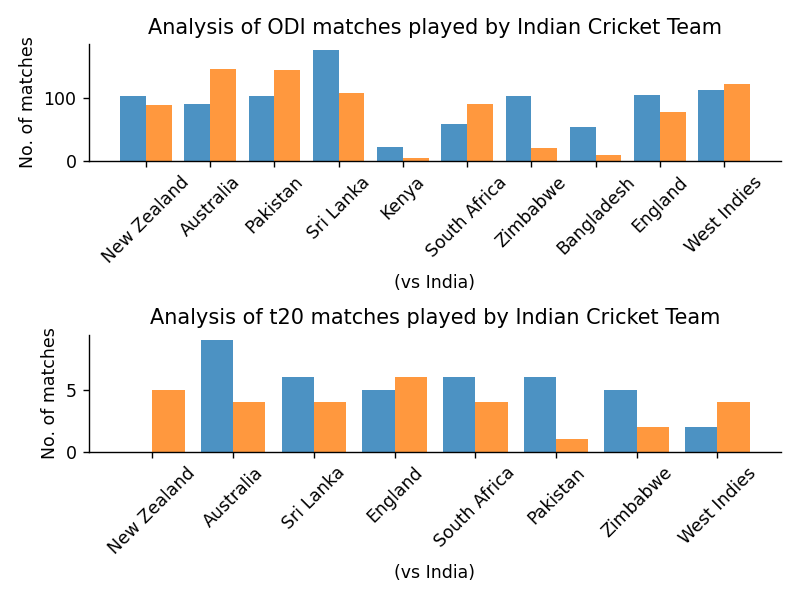

In [8]:
fig,((ax1,ax3)) = plt.subplots(2,1)


ax1.bar(list(range(len(teams_odi))),odi_won,width = 0.4,alpha = 0.8)
ax1.bar([i+0.4 for i in list(range(len(teams_odi)))],odi_lost,width = 0.4,alpha = 0.8)
ax1.spines['right'].set_color('None')
ax1.spines['top'].set_color('None')
ax1.set_xticks([])
ax1.set_xticks([i+0.2 for i in list(range(len(teams_odi)))])
ax1.set_xticklabels(teams_odi,rotation = 45)
ax1.set_xlabel('(vs India)')
ax1.set_ylabel('No. of matches')
ax1.set_title('Analysis of ODI matches played by Indian Cricket Team')


ax3.bar(list(range(len(teams_t20))),t20_won,width = 0.4,alpha = 0.8)
ax3.spines['right'].set_color('None')
ax3.spines['top'].set_color('None')
ax3.set_xticks([])
ax3.set_xticks([i+0.2 for i in list(range(len(teams_t20)))])
ax3.set_xticklabels(teams_t20,rotation = 45)
ax3.set_xlabel('(vs India)')
ax3.set_ylabel('No. of matches')
ax3.set_title('Analysis of t20 matches played by Indian Cricket Team')
ax3.bar([i+0.4 for i in list(range(len(teams_t20)))],t20_lost,width = 0.4,alpha = 0.8)
plt.tight_layout()